# Método de Jacobi para Sistemas de Equações Lineares Algébricas (S.E.L.A.)

### Importar as biblioteas

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

import numpy as np
import matplotlib.pyplot as plt

### Definir o sistema

$$\begin{equation}
\begin{cases}
    3x+2y=6\\
    2x+3y=5
\end{cases}
\end{equation}$$

### Forma matricial:

$$\begin{pmatrix}
3 & 2\\
2 & 3
\end{pmatrix} \cdot \begin{pmatrix}
x\\
y
\end{pmatrix} = \begin{pmatrix}
6\\
5
\end{pmatrix}$$

In [2]:
A = np.array([[3,2],
              [2,3]])

b = np.array([[6],
              [5]])

e = 1e-6

### Critérios de parada:

1. $|A \cdot \vec{x}^{^{(n+1)}}-\vec{b}| < \epsilon$
2. $|\vec{x}^{^{(n+1)}}-\vec{x}^{^{(n)}}| < \epsilon$

In [3]:
def criterio1(A,x,b,e) :
    return np.linalg.norm(A.dot(x)-b)<e

def criterio2(xnew,xold,e) :
    return np.linalg.norm(xnew-xold)<e

### Passos

1) Dividir (A|b) pelos elementos da diagonal principal, resulta em (F|d).

In [4]:
F = []
d = []

for i in range(len(A)) :
    F.append(A[i]/A[i][i])
    d.append(b[i]/A[i][i])

F = np.array(F)
d = np.array(d).reshape(-1,1)

print(F, F.shape)
print(d, d.shape)

[[1.         0.66666667]
 [0.66666667 1.        ]] (2, 2)
[[2.        ]
 [1.66666667]] (2, 1)


2) Executar até o critério de parada

$F \vec{x} = \vec{d}$

$F \vec{x} + I \vec{x} = \vec{d} + I \vec{x}$

$I \vec{x} = I \vec{x} - F \vec{x} + \vec{d}$

$$\vec{x}^{^{(n+1)}} = (I-F) \cdot \vec{x}^{^{(n)}} + \vec{d}$$

In [5]:
x = np.zeros(d.shape)
resultsx = [0]
resultsy = [0]
n = 0

while not(criterio1(A,x,b,e)) and n<200 :
    x = (np.identity(F.shape[0])-F).dot(x) + d
    n+=1
    resultsx.append(x[0][0])
    resultsy.append(x[1][0])

Convergência (40 iterações):


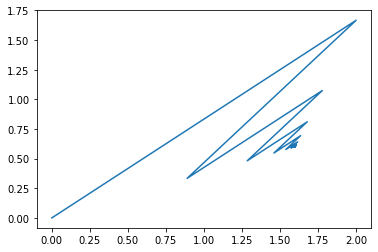

Solução
[[1.59999986]
 [0.59999995]]

Resultado
[[5.99999946]
 [4.99999955]]

Diferença
[[-5.42626360e-07]
 [-4.52188633e-07]]
7.063412251864908e-07



In [6]:
print(f"Convergência ({n} iterações):")

plt.plot(resultsx, resultsy)
plt.show()

print("Solução",x,sep='\n',end='\n\n')
print("Resultado",A.dot(x),sep='\n',end='\n\n')
print("Diferença",A.dot(x)-b,np.linalg.norm(A.dot(x)-b),sep='\n',end='\n\n')

***

### Forma equacional

Para cada $x_i$:

$$x_i^{(k+1)} = \frac{b_i - \cdots - a_{i(i-2)}x_{(i-2)}^{(k)} - a_{i(i-1)}x_{(i-1)}^{(k)} - a_{i(i+1)}x_{(i+1)}^{(k)} - a_{i(i+2)}x_{(i+2)}^{(k)} - \cdots - a_{in}x_n^{(k)}}{a_{ii}}$$

Somente após executar todas as operações da iteração $k$, troca-se a tabela com os valores atualizados de x.

In [7]:
x = np.zeros(b.shape)
xit = x.copy()
n = 0

resultsx = [0]
resultsy = [0]

while not(criterio1(A,x,b,e)) :
    for i in range(len(A)) :
        xit[i] = (b[i][0] - (np.sum(A[i].dot(x)) - A[i][i]*x[i][0]))/A[i][i]
    x = xit.copy()
    resultsx.append(x[0][0])
    resultsy.append(x[1][0])
    n+=1

Convergência (40 iterações):


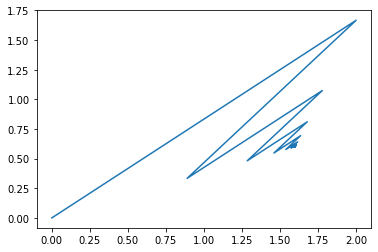

Solução
[[1.59999986]
 [0.59999995]]

Resultado
[[5.99999946]
 [4.99999955]]

Diferença
[[-5.42626361e-07]
 [-4.52188635e-07]]
7.063412270060044e-07



In [8]:
print(f"Convergência ({n} iterações):")

plt.plot(resultsx,resultsy)
plt.show()

print("Solução",x,sep='\n',end='\n\n')
print("Resultado",A.dot(x),sep='\n',end='\n\n')
print("Diferença",A.dot(x)-b,np.linalg.norm(A.dot(x)-b),sep='\n',end='\n\n')